In [1]:
# replicate simulation of selfish mine in original paper

In [51]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import progressbar

In [52]:
class Simulator(object):
    def __init__(self, alpha, gamma):
        self.alpha = alpha
        self.gamma = gamma
        self.public_chain = []
        self.private_chain = []
        self.private_branch_length = 0
    
    def simulate(self):
        for _ in range(100000):
            selfish_block = np.random.choice([1, 0], p=[self.alpha, 1-self.alpha])
            if selfish_block:
                prev_diff = len(self.private_chain) - len(self.public_chain)
                self.private_chain.append('s')
                self.private_branch_length += 1
                
                # Selfish miner won the 1 to 1 tie and publishes entire private chain.
                if (prev_diff == 0) and (self.private_branch_length == 2):
                    self.public_chain = copy.copy(self.private_chain)
                    self.private_branch_length = 0
            
            else:
                prev_diff = len(self.private_chain) - len(self.public_chain)
                self.public_chain.append('h')
                
                # Honest miners win race.
                if prev_diff == 0:
                    self.private_chain = copy.copy(self.public_chain)
                    self.private_branch_length = 0
                
                # Selfish miners were 1 ahead and honest caught them.
                elif prev_diff == 1:
                    # Probability of winning is all selfish miners and all honest miners who
                    # use the selfish block to mine on.
                    total_compute_power = self.alpha + (1 - self.alpha)*self.gamma
                    if np.random.uniform() < total_compute_power:
                        self.public_chain = copy.copy(self.private_chain)
                
                # Selfish was 2 ahead and now published entire private.
                elif prev_diff == 2:
                    self.public_chain = copy.copy(self.private_chain)
                    self.private_branch_length = 0
                
                # 3+ lead for selfish.
                else:
                    total_compute_power = self.alpha + (1 - self.alpha)*self.gamma
                    if np.random.uniform() < total_compute_power:
                        self.public_chain[-1] = 's'
        
        # At end if selfish have lead they publish them all.
        if self.private_branch_length > 0:
            self.public_chain = copy.copy(self.private_chain)

In [53]:
results = []
bar = progressbar.ProgressBar()
for alpha in bar(np.linspace(0, 0.5, 11)):
    sim = Simulator(alpha, 1)
    sim.simulate()
    results.append(sim.public_chain.count('s') / len(sim.public_chain))

100% (11 of 11) |########################| Elapsed Time: 0:03:34 Time:  0:03:34


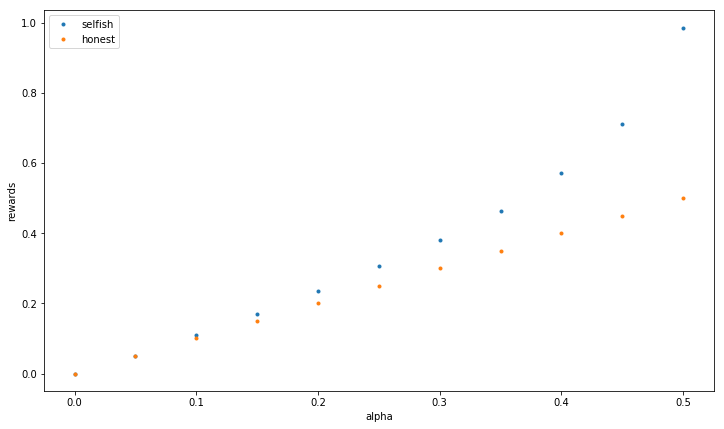

In [59]:
f, ax = plt.subplots(figsize=(12,7))
ax.plot(np.linspace(0, 0.5, 11), results, '.', label='selfish')
ax.plot(np.linspace(0, 0.5, 11), np.linspace(0, 0.5, 11), '.', label='honest')
ax.set_xlabel('alpha')
ax.set_ylabel('rewards')
plt.legend()
plt.savefig('selfish-rewards.png')
plt.show()